In [1]:
# Importing all required packages
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics

%matplotlib inline

In [2]:
lead_df = pd.read_csv("Leads.csv")
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
lead_df.shape

(9240, 37)

In [4]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
lead_df.isna().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

### Replacing "Select" values to Null 

In [6]:
column_list = list(lead_df.columns)
column_list

['Prospect ID',
 'Lead Number',
 'Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Last Activity',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Lead Quality',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'Lead Profile',
 'City',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [7]:
print(len(lead_df[lead_df['Lead Profile'].str.upper() == 'SELECT']))
print(len(lead_df[lead_df['Lead Profile'] == 'Select']))

4146
4146


In [8]:
df_datatype = pd.DataFrame({'Column_Name':[],'Dtype_Name':[]})
for column in column_list:
    df_datatype = df_datatype.append({'Column_Name':column,'Dtype_Name':lead_df[column].dtype},ignore_index=True)
    df_datatype.reset_index()
df_datatype

,Column_Name,Dtype_Name
0,Prospect ID,object
1,Lead Number,int64
2,Lead Origin,object
3,Lead Source,object
4,Do Not Email,object
5,Do Not Call,object
6,Converted,int64
7,TotalVisits,float64
8,Total Time Spent on Website,int64
9,Page Views Per Visit,float64


In [9]:
Non_numeric_col_list = list(df_datatype[~((df_datatype['Dtype_Name'] == "float64") |(df_datatype['Dtype_Name'] == "int64"))].Column_Name)
Non_numeric_col_list

['Prospect ID',
 'Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Lead Quality',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'Lead Profile',
 'City',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [10]:
df_select = pd.DataFrame({'Column_Name':[],'Number_of_Select_Record':[]})

for column in Non_numeric_col_list:
    df_select =  df_select.append({'Column_Name':column,'Number_of_Select_Record':len(lead_df[lead_df[column].str.upper() == 'SELECT'])}
                                 ,ignore_index=True)
df_select

,Column_Name,Number_of_Select_Record
0,Prospect ID,0.0
1,Lead Origin,0.0
2,Lead Source,0.0
3,Do Not Email,0.0
4,Do Not Call,0.0
5,Last Activity,0.0
6,Country,0.0
7,Specialization,1942.0
8,How did you hear about X Education,5043.0
9,What is your current occupation,0.0


In [11]:
lead_df = lead_df.replace("Select",np.nan)

In [12]:
lead_df.isna().sum().sort_values(ascending=False)

How did you hear about X Education               7250
Lead Profile                                     6855
Lead Quality                                     4767
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Activity Index                      4218
Asymmetrique Profile Index                       4218
City                                             3669
Specialization                                   3380
Tags                                             3353
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

In [13]:
#checking the columns those are still having missing values for more than 25% record and dropping them 
lead_df.columns[lead_df.isna().sum() > (len(lead_df)*0.25)]

Index(['Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'Lead Quality',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],
      dtype='object')

In [14]:
lead_final = lead_df[lead_df.columns[lead_df.isna().sum() < (len(lead_df)*0.25)]]

In [15]:
lead_final.isna().sum().sort_values(ascending=False)/len(lead_final)*100

TotalVisits                                 1.482684
Page Views Per Visit                        1.482684
Last Activity                               1.114719
Lead Source                                 0.389610
Prospect ID                                 0.000000
X Education Forums                          0.000000
A free copy of Mastering The Interview      0.000000
I agree to pay the amount through cheque    0.000000
Get updates on DM Content                   0.000000
Update me on Supply Chain Content           0.000000
Receive More Updates About Our Courses      0.000000
Through Recommendations                     0.000000
Digital Advertisement                       0.000000
Newspaper                                   0.000000
Magazine                                    0.000000
Newspaper Article                           0.000000
Lead Number                                 0.000000
Search                                      0.000000
Total Time Spent on Website                 0.

In [16]:
lead_final.shape

(9240, 24)

### dropping Rows with null value as the percentage of records holding null value is very low (< 2%)

In [17]:
lead_final = lead_final.dropna()
lead_final.shape

(9074, 24)

In [18]:
lead_final.isna().sum().sort_values(ascending=False)/len(lead_final)*100

Prospect ID                                 0.0
Lead Number                                 0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Magazine                                    0.0
Search                                      0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website                 0.0
TotalVisits                                 0.0
Converted                                   0.0
Do Not Call                                 0.0
Do Not Email                            

In [19]:
lead_final.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,No,No,No,Modified


In [20]:
lead_final.nunique().sort_values(ascending = False)

Prospect ID                                 9074
Lead Number                                 9074
Total Time Spent on Website                 1717
Page Views Per Visit                         114
TotalVisits                                   41
Lead Source                                   21
Last Activity                                 17
Last Notable Activity                         16
Lead Origin                                    4
Converted                                      2
Do Not Call                                    2
Do Not Email                                   2
Search                                         2
Newspaper Article                              2
X Education Forums                             2
Newspaper                                      2
Digital Advertisement                          2
Through Recommendations                        2
A free copy of Mastering The Interview         2
Receive More Updates About Our Courses         1
Update me on Supply 

#### dropping below 4 columns as these columns holds single values as No. It will increase co-linearity and model will become overfit

In [21]:
# dropping below 4 columns as these columns holds single values as No. It will increase co-linearity and model will become overfit
lead_final[['Receive More Updates About Our Courses','Get updates on DM Content','Update me on Supply Chain Content',
            'I agree to pay the amount through cheque','Magazine']].value_counts()

Receive More Updates About Our Courses  Get updates on DM Content  Update me on Supply Chain Content  I agree to pay the amount through cheque  Magazine
No                                      No                         No                                 No                                        No          9074
dtype: int64

In [22]:
lead_final.drop(['Receive More Updates About Our Courses','Get updates on DM Content','Update me on Supply Chain Content',
                 'I agree to pay the amount through cheque','Magazine'],axis=1,inplace=True)
lead_final.shape

(9074, 19)

In [23]:
lead_final.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,No,No,No,No,No,No,No,Modified


In [24]:
lead_final.nunique().sort_values(ascending = False)

Prospect ID                               9074
Lead Number                               9074
Total Time Spent on Website               1717
Page Views Per Visit                       114
TotalVisits                                 41
Lead Source                                 21
Last Activity                               17
Last Notable Activity                       16
Lead Origin                                  4
Do Not Email                                 2
Do Not Call                                  2
Converted                                    2
Search                                       2
Newspaper Article                            2
X Education Forums                           2
Newspaper                                    2
Digital Advertisement                        2
Through Recommendations                      2
A free copy of Mastering The Interview       2
dtype: int64

In [25]:
lead_final['Last Activity'].value_counts()

Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [26]:
lead_final[lead_final.Converted == 1]['Last Notable Activity'].value_counts()

SMS Sent                    1489
Email Opened                1042
Modified                     680
Page Visited on Website       93
Email Link Clicked            45
Olark Chat Conversation       25
Unreachable                   22
Had a Phone Conversation      13
Unsubscribed                  12
Email Bounced                  9
Email Marked Spam              2
Approached upfront             1
Resubscribed to emails         1
Email Received                 1
Name: Last Notable Activity, dtype: int64

In [29]:
lead_final[lead_final.Converted == 0]['Last Notable Activity'].value_counts()

Modified                        2587
Email Opened                    1781
SMS Sent                         663
Page Visited on Website          225
Olark Chat Conversation          158
Email Link Clicked               128
Email Bounced                     51
Unsubscribed                      33
Unreachable                       10
Had a Phone Conversation           1
View in browser link Clicked       1
Form Submitted on Website          1
Name: Last Notable Activity, dtype: int64

In [30]:
lead_final[lead_final.Converted == 0]['Last Activity'].value_counts()

Email Opened                    2182
SMS Sent                        1011
Olark Chat Conversation          888
Page Visited on Website          489
Converted to Lead                374
Email Bounced                    296
Email Link Clicked               194
Form Submitted on Website         88
Unreachable                       61
Unsubscribed                      45
View in browser link Clicked       5
Had a Phone Conversation           5
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [31]:
lead_final[lead_final.Converted == 1]['Last Activity'].value_counts()

SMS Sent                        1705
Email Opened                    1250
Page Visited on Website          151
Olark Chat Conversation           84
Email Link Clicked                73
Converted to Lead                 54
Unreachable                       29
Form Submitted on Website         28
Had a Phone Conversation          20
Email Bounced                     16
Unsubscribed                      14
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
View in browser link Clicked       1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

#### Dropping 'Last Notable Activity' as it holds similar information like 'Last Activity'

In [32]:
lead_final.drop(['Last Notable Activity'],axis=1,inplace=True)
lead_final.shape

(9074, 18)

In [33]:
lead_final['Last Activity'].value_counts()

Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [93]:
lead_final['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [87]:
Lead_Source = lead_final['Lead Source'].value_counts().reset_index()
Lead_Source.columns

Index(['index', 'Lead Source'], dtype='object')

In [91]:
list(Lead_Source[Lead_Source['Lead Source']>30]['index'])

['Google',
 'Direct Traffic',
 'Olark Chat',
 'Organic Search',
 'Reference',
 'Welingak Website',
 'Referral Sites',
 'Facebook']

In [94]:
lead_final.shape

(9074, 18)

In [95]:
lead_score = lead_final.groupby(['Lead Source','Converted']).count().sort_values(['Prospect ID'],ascending=False)
lead_score['Prospect ID']

Lead Source        Converted
Direct Traffic     0            1725
Google             0            1721
Olark Chat         0            1305
Google             1            1147
Direct Traffic     1             818
Organic Search     0             718
Olark Chat         1             448
Organic Search     1             436
Reference          1             410
Welingak Website   1             127
Referral Sites     0              94
Reference          0              33
Referral Sites     1              31
Facebook           0              22
                   1               9
bing               0               5
google             0               5
Click2call         1               3
Live Chat          1               2
Press_Release      0               2
Welingak Website   0               2
welearnblog_Home   0               1
testone            0               1
blog               0               1
bing               1               1
Click2call         0               1
WeLearn  

In [100]:
(lead_final[lead_final['Lead Source'].isin(list(Lead_Source[Lead_Source['Lead Source']<30]['index']))].shape[0]/lead_final.shape[0])*100

0.3085739475424289

#### Dropping rows with 'Lead Source' occurance value less than 30 to reduce the cardinality of the feature and data frame as the percentage of such records are 0.30%

In [104]:
lead_final = lead_final[lead_final['Lead Source'].isin(list(Lead_Source[Lead_Source['Lead Source']>30]['index']))]

In [105]:
lead_final.shape

(9046, 18)

#### Handling 'Last Activity'

In [108]:
lead_final['Last Activity'].value_counts()

Email Opened                    3422
SMS Sent                        2712
Olark Chat Conversation          971
Page Visited on Website          631
Converted to Lead                426
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       89
Unsubscribed                      58
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [113]:
Last_Activity = lead_final['Last Activity'].value_counts().reset_index()
Last_Activity

,index,Last Activity
0,Email Opened,3422
1,SMS Sent,2712
2,Olark Chat Conversation,971
3,Page Visited on Website,631
4,Converted to Lead,426
5,Email Bounced,312
6,Email Link Clicked,267
7,Form Submitted on Website,116
8,Unreachable,89
9,Unsubscribed,58


In [116]:
list(Last_Activity[Last_Activity['Last Activity']<25]['index'])

['View in browser link Clicked',
 'Approached upfront',
 'Email Received',
 'Email Marked Spam',
 'Visited Booth in Tradeshow',
 'Resubscribed to emails']

In [121]:
(lead_final[lead_final['Last Activity'].isin(list(Last_Activity[Last_Activity['Last Activity']<25]['index']))].shape[0]/len(lead_final))*100

0.18792836612867564

#### Dropping rows with such 'Last Activity' values whose occurance value less than 25 to reduce the cardinality of the feature and data frame as the percentage of such records are 0.18%

In [124]:
lead_final = lead_final[lead_final['Last Activity'].isin(list(Last_Activity[Last_Activity['Last Activity']>=25]['index']))]
lead_final.shape

(9029, 18)

In [127]:
lead_final.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,No,No,No,No,No,No,No
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,No,No,No,No,No,No,No
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,No,No,No,No,No,No,Yes
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,No,No,No,No,No,No,No
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,No,No,No,No,No,No,No


In [128]:
lead_final.nunique().sort_values(ascending = False)

Prospect ID                               9029
Lead Number                               9029
Total Time Spent on Website               1715
Page Views Per Visit                       114
TotalVisits                                 41
Last Activity                               11
Lead Source                                  8
Lead Origin                                  4
Do Not Email                                 2
Do Not Call                                  2
Converted                                    2
Search                                       2
Newspaper Article                            2
X Education Forums                           2
Newspaper                                    2
Digital Advertisement                        2
Through Recommendations                      2
A free copy of Mastering The Interview       2
dtype: int64

### Categorical Variable Transforamtion (one-hot-Endcoding and Label Encoding)

#### Converting some binary variables (Yes/No) to 0/1

In [137]:
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']
# Defining the map function
def binary_map(x):
    return x.map({"Yes": 1, "No": 0})
# Applying the function lead_final
lead_final[varlist] = lead_final[varlist].apply(binary_map)

In [138]:
lead_final[varlist].value_counts()

Do Not Email  Do Not Call  Search  Newspaper Article  X Education Forums  Newspaper  Digital Advertisement  Through Recommendations  A free copy of Mastering The Interview
0             0            0       0                  0                   0          0                      0                        0                                         5713
                                                                                                                                     1                                         2581
1             0            0       0                  0                   0          0                      0                        0                                          418
                                                                                                                                     1                                          292
0             0            1       0                  0                   0          0                      

In [141]:
lead_final.nunique().sort_values(ascending = False)

Prospect ID                               9029
Lead Number                               9029
Total Time Spent on Website               1715
Page Views Per Visit                       114
TotalVisits                                 41
Last Activity                               11
Lead Source                                  8
Lead Origin                                  4
Do Not Email                                 2
Do Not Call                                  2
Converted                                    2
Search                                       2
Newspaper Article                            2
X Education Forums                           2
Newspaper                                    2
Digital Advertisement                        2
Through Recommendations                      2
A free copy of Mastering The Interview       2
dtype: int64

#### For categorical variables with multiple levels, creating dummy features

#### Converting "Lead Origin"

In [142]:
lead_final['Lead Origin'].value_counts()

Landing Page Submission    4859
API                        3566
Lead Add Form               574
Lead Import                  30
Name: Lead Origin, dtype: int64

In [143]:
# Creating dummy variables for the variable 'Lead Origin'
LO = pd.get_dummies(lead_final['Lead Origin'], prefix='LeadOrigin')

# Dropping LeadOrigin_Lead Import column as it has minimum number of ocuurance
LO1 = LO.drop(['LeadOrigin_Lead Import'], 1)

#Adding the results to the master dataframe
lead_final = pd.concat([lead_final,LO1], axis=1)

In [144]:
lead_final.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,LeadOrigin_API,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,0,0,0,0,0,0,1,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,0,0,0,0,0,0,1,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,0,0,0,0,0,1,0,1,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,0,0,0,0,0,0,0,1,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,0,0,0,0,0,0,0,1,0


#### Converting "Lead Source"

In [145]:
lead_final['Lead Source'].value_counts()

Google              2861
Direct Traffic      2539
Olark Chat          1749
Organic Search      1153
Reference            442
Welingak Website     129
Referral Sites       125
Facebook              31
Name: Lead Source, dtype: int64

In [146]:
# Creating dummy variables for the variable 'Lead Origin'
LS = pd.get_dummies(lead_final['Lead Source'], prefix='LeadSource')

# Dropping LeadSource_Facebook column as it has minimum number of ocuurance
LS1 = LS.drop(['LeadSource_Facebook'], 1)

#Adding the results to the master dataframe
lead_final = pd.concat([lead_final,LS1], axis=1)

In [147]:
lead_final.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,LeadOrigin_API,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadSource_Direct Traffic,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Reference,LeadSource_Referral Sites,LeadSource_Welingak Website
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,1,0,0,0,0,1,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,1,0,0,0,0,0,1,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,1,0,1,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,1,0,1,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,1,0,0,1,0,0,0,0,0


#### Converting "Last Activity"

In [148]:
lead_final['Last Activity'].value_counts()

Email Opened                 3422
SMS Sent                     2712
Olark Chat Conversation       971
Page Visited on Website       631
Converted to Lead             426
Email Bounced                 312
Email Link Clicked            267
Form Submitted on Website     116
Unreachable                    89
Unsubscribed                   58
Had a Phone Conversation       25
Name: Last Activity, dtype: int64

In [149]:
# Creating dummy variables for the variable 'Lead Origin'
LA = pd.get_dummies(lead_final['Last Activity'], prefix='LastActivity')

# Dropping LastActivity_Had a Phone Conversation column as it has minimum number of ocuurance
LA1 = LA.drop(['LastActivity_Had a Phone Conversation'], 1)

#Adding the results to the master dataframe
lead_final = pd.concat([lead_final,LA1], axis=1)

In [150]:
lead_final.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,LastActivity_Converted to Lead,LastActivity_Email Bounced,LastActivity_Email Link Clicked,LastActivity_Email Opened,LastActivity_Form Submitted on Website,LastActivity_Olark Chat Conversation,LastActivity_Page Visited on Website,LastActivity_SMS Sent,LastActivity_Unreachable,LastActivity_Unsubscribed
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,0,0,0,0,0,1,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,0,0,1,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,0,0,1,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,0,0,0,0,0,0,0,1,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,1,0,0,0,0,0,0,0,0,0


In [151]:
# We have created dummies for the below variables, so we can drop them
lead_final = lead_final.drop(['Lead Origin','Last Activity','Lead Source'], 1)

In [153]:
lead_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9029 entries, 0 to 9239
Data columns (total 35 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9029 non-null   object 
 1   Lead Number                             9029 non-null   int64  
 2   Do Not Email                            9029 non-null   int64  
 3   Do Not Call                             9029 non-null   int64  
 4   Converted                               9029 non-null   int64  
 5   TotalVisits                             9029 non-null   float64
 6   Total Time Spent on Website             9029 non-null   int64  
 7   Page Views Per Visit                    9029 non-null   float64
 8   Search                                  9029 non-null   int64  
 9   Newspaper Article                       9029 non-null   int64  
 10  X Education Forums                      9029 non-null   int6

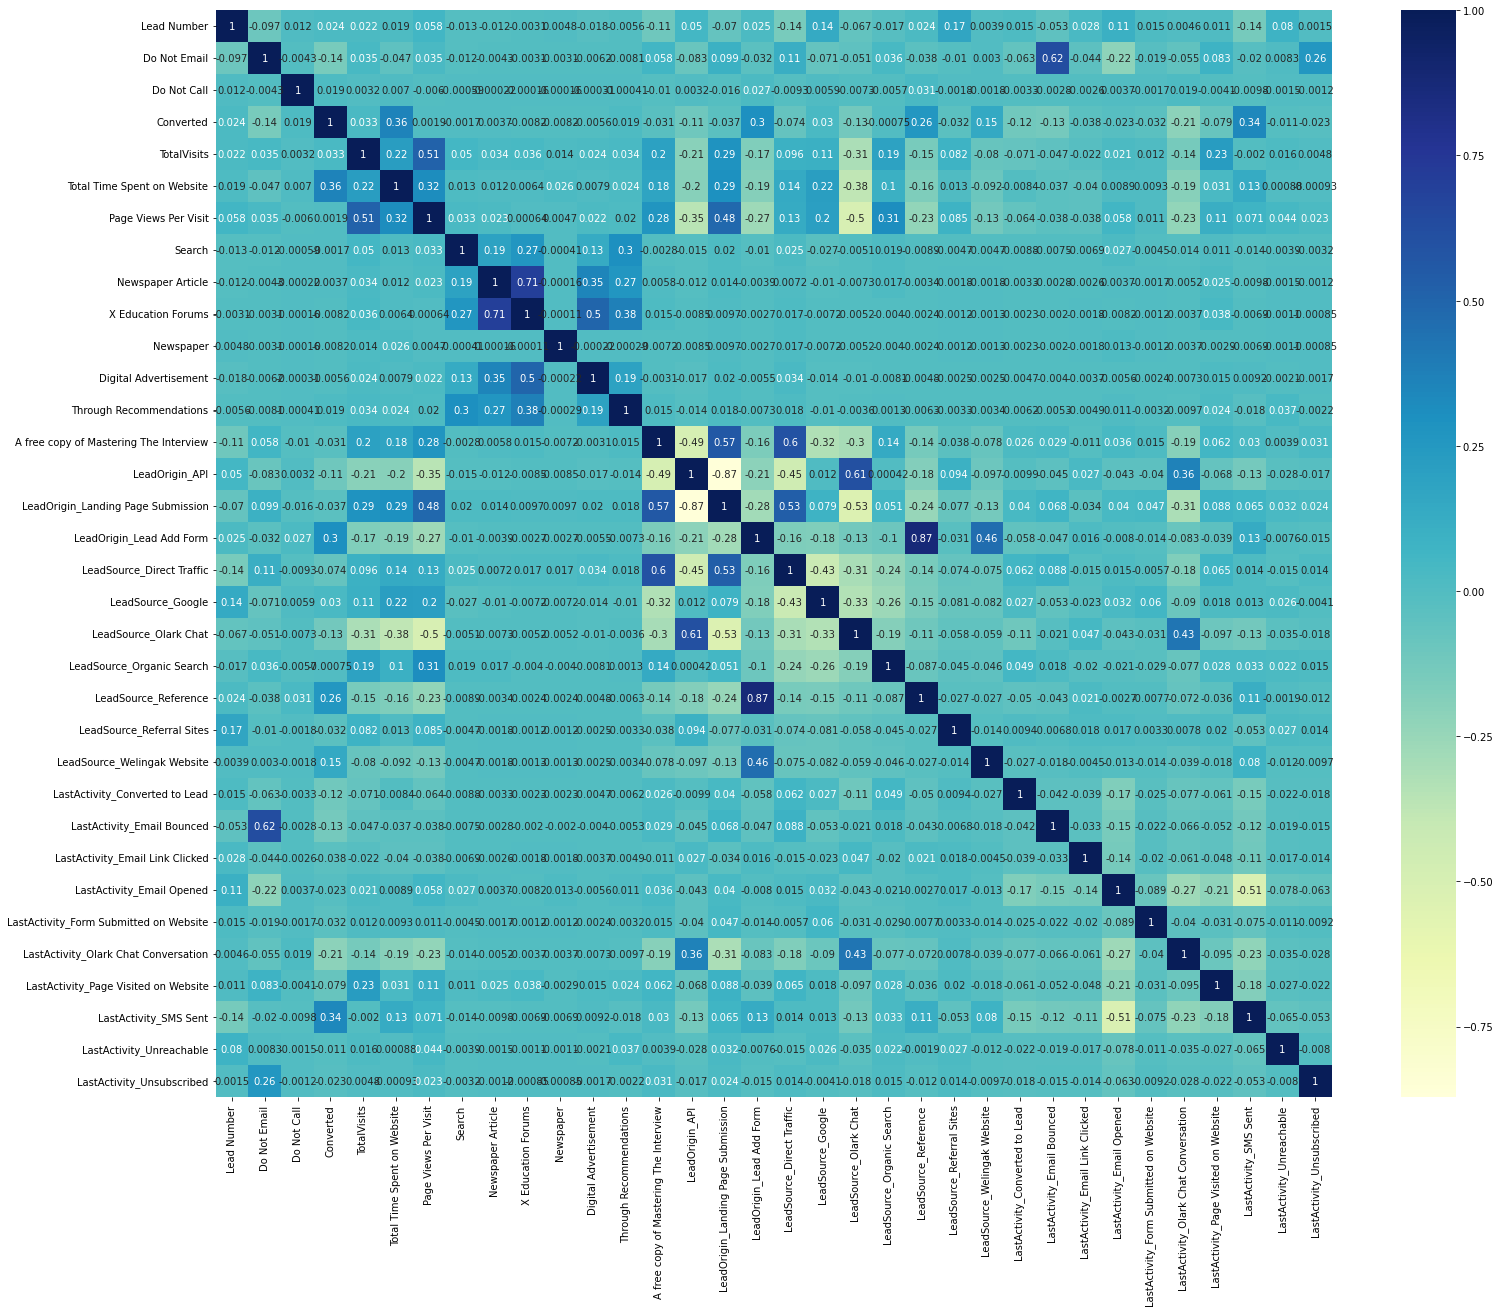

In [168]:
plt.figure(figsize = (25, 20))
sns.heatmap(lead_final.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Step : Test-Train Split

In [318]:
# Putting feature variable to X
X = lead_final.drop(['Prospect ID','Lead Number','Converted'], axis=1)

X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,LastActivity_Converted to Lead,LastActivity_Email Bounced,LastActivity_Email Link Clicked,LastActivity_Email Opened,LastActivity_Form Submitted on Website,LastActivity_Olark Chat Conversation,LastActivity_Page Visited on Website,LastActivity_SMS Sent,LastActivity_Unreachable,LastActivity_Unsubscribed
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [319]:
# Putting response variable to y
y = lead_final['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [172]:
X[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9029.000000,9029.000000,9029.00000
mean,3.452320,482.747480,2.36786
std,4.861811,545.368375,2.15923
min,0.000000,0.000000,0.00000
25%,1.000000,11.000000,1.00000
50%,3.000000,246.000000,2.00000
75%,5.000000,921.000000,3.00000
max,251.000000,2272.000000,55.00000


In [320]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [321]:
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,LastActivity_Converted to Lead,LastActivity_Email Bounced,LastActivity_Email Link Clicked,LastActivity_Email Opened,LastActivity_Form Submitted on Website,LastActivity_Olark Chat Conversation,LastActivity_Page Visited on Website,LastActivity_SMS Sent,LastActivity_Unreachable,LastActivity_Unsubscribed
5535,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8079,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4759,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9117,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2428,0,0,2.0,231,2.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [322]:
X_train.shape

(6320, 32)

In [323]:
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,6320.000000,6320.000000,6320.000000
mean,3.426582,488.450475,2.347802
std,5.164579,547.813184,2.078104
min,0.000000,0.000000,0.000000
25%,1.000000,10.750000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,930.500000,3.000000
max,251.000000,2253.000000,24.000000


### Feature Scaling

#### Dropping 'Page Views Per Visit' before feature scaling it has +ve colinearity with Total Visits and Total time spent on website

In [324]:
X_test = X_test.drop(['Page Views Per Visit'], 1)
X_train = X_train.drop(['Page Views Per Visit'], 1)

In [325]:
scaler = MinMaxScaler()

X_train[['TotalVisits','Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,...,LastActivity_Converted to Lead,LastActivity_Email Bounced,LastActivity_Email Link Clicked,LastActivity_Email Opened,LastActivity_Form Submitted on Website,LastActivity_Olark Chat Conversation,LastActivity_Page Visited on Website,LastActivity_SMS Sent,LastActivity_Unreachable,LastActivity_Unsubscribed
5535,0,0,0.000000,0.00000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8079,0,0,0.000000,0.00000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4759,0,0,0.000000,0.00000,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9117,0,0,0.000000,0.00000,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2428,0,0,0.007968,0.10253,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [326]:
### Checking the lead coversion Rate
convert = (sum(lead_final['Converted'])/len(lead_final['Converted'].index))*100
convert

37.822571713368035

### Step : Looking at Correlations

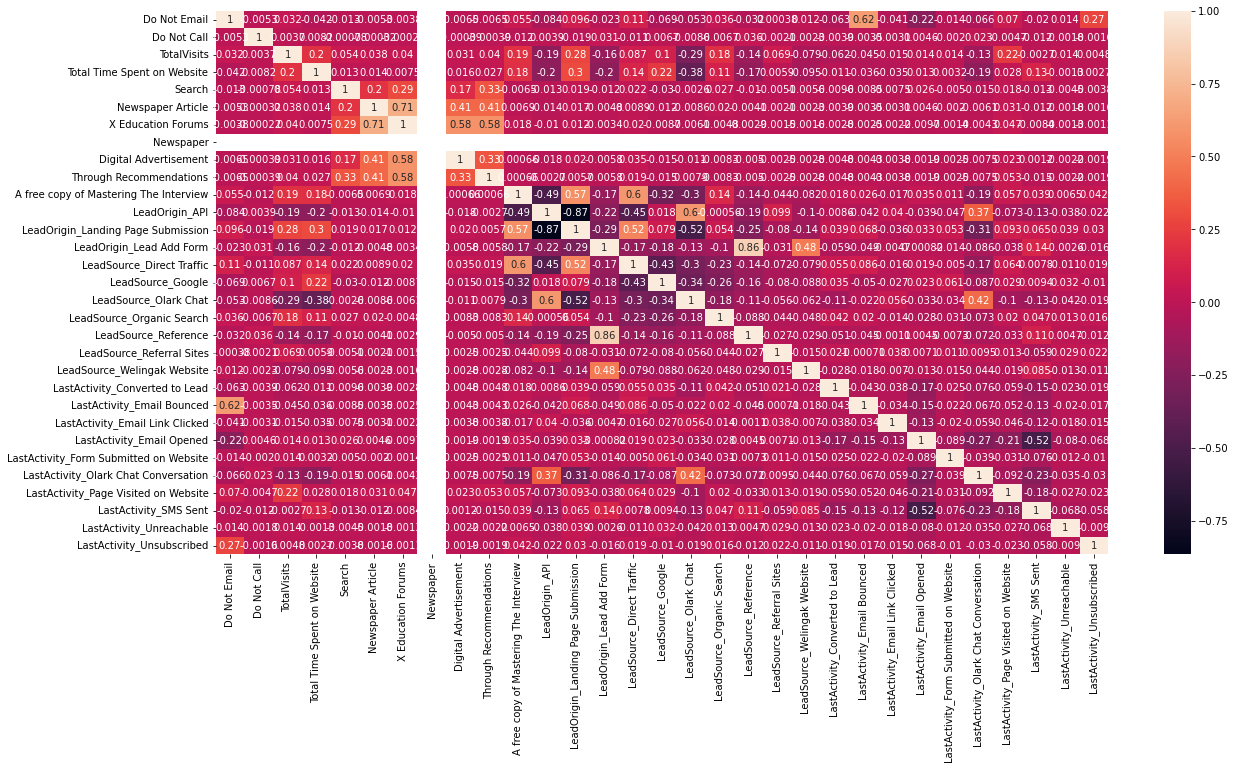

In [327]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(X_train.corr(),annot = True)
plt.show()

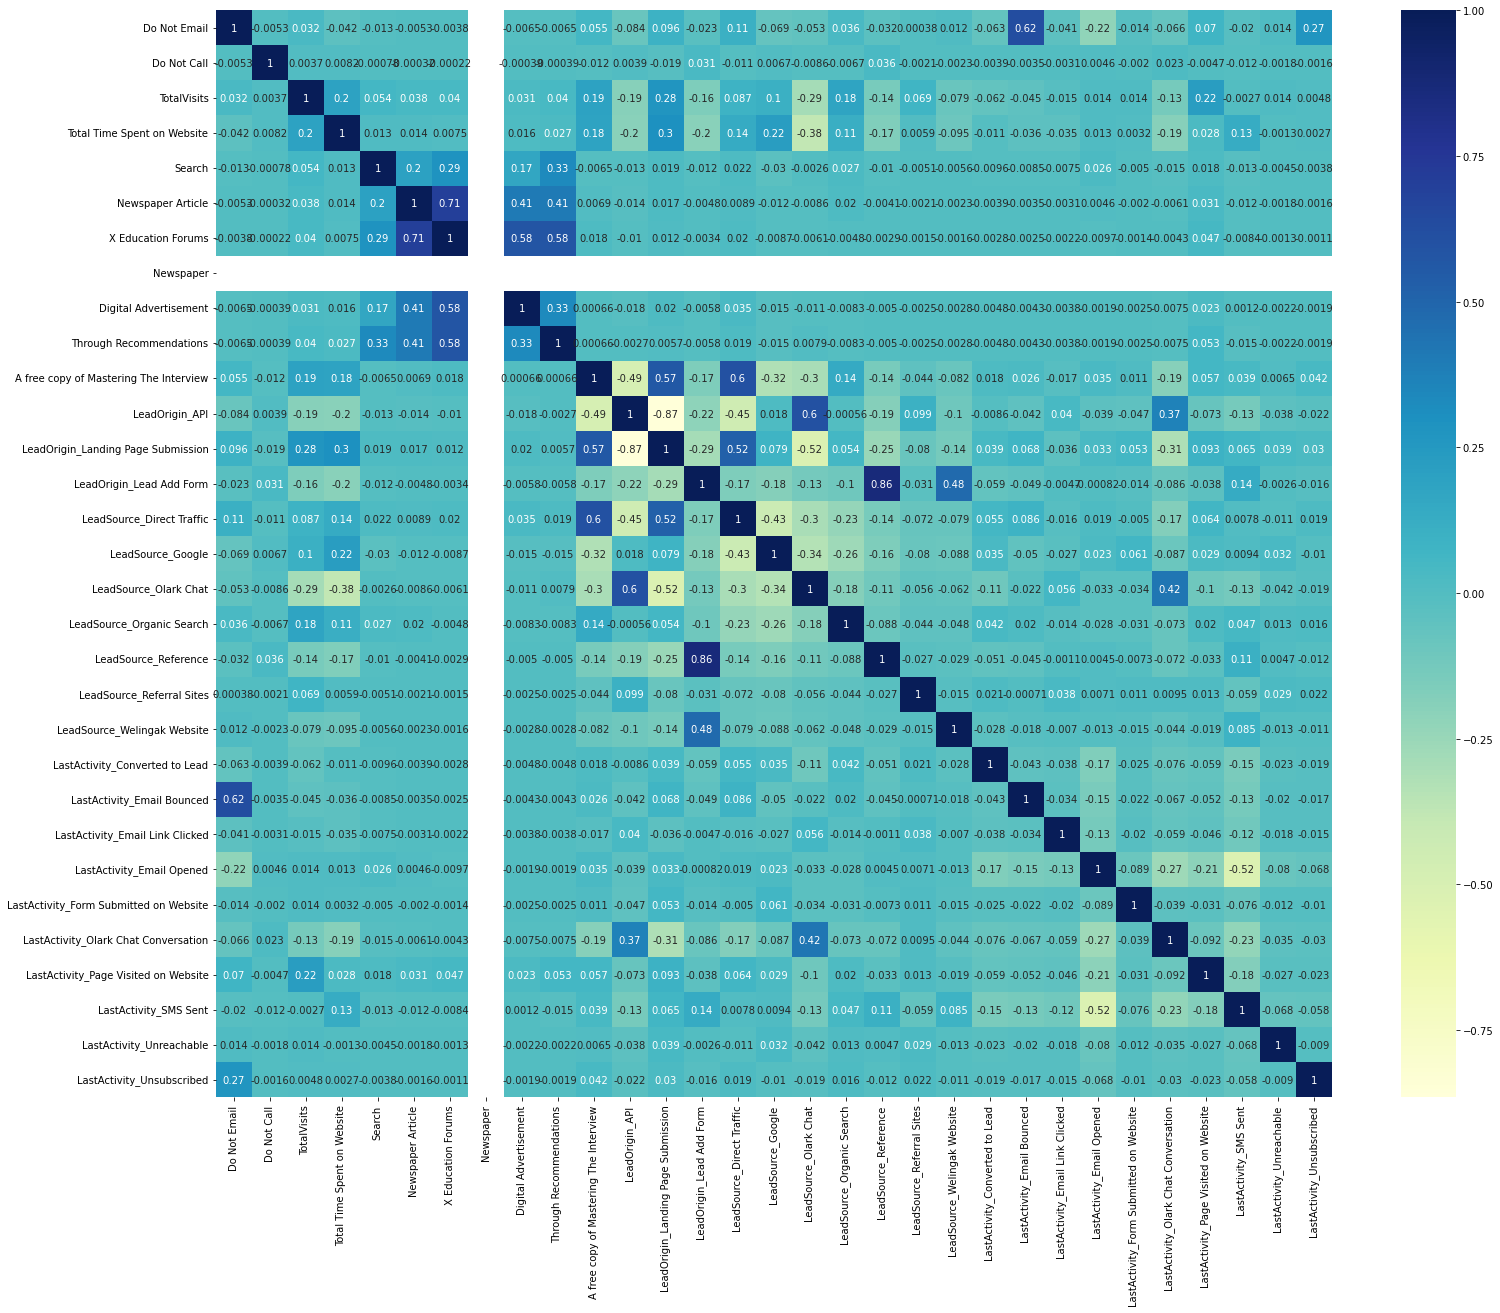

In [328]:
plt.figure(figsize = (25, 20))
sns.heatmap(X_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [329]:
X_train.Newspaper.value_counts()

0    6320
Name: Newspaper, dtype: int64

In [330]:
X_test.Newspaper.value_counts()

0    2708
1       1
Name: Newspaper, dtype: int64

#### Dropping News paper as it has a single value and its highly correlated

In [331]:
X_test = X_test.drop(['Newspaper'], 1)
X_train = X_train.drop(['Newspaper'], 1)

In [332]:
lead_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9029 entries, 0 to 9239
Data columns (total 35 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9029 non-null   object 
 1   Lead Number                             9029 non-null   int64  
 2   Do Not Email                            9029 non-null   int64  
 3   Do Not Call                             9029 non-null   int64  
 4   Converted                               9029 non-null   int64  
 5   TotalVisits                             9029 non-null   float64
 6   Total Time Spent on Website             9029 non-null   int64  
 7   Page Views Per Visit                    9029 non-null   float64
 8   Search                                  9029 non-null   int64  
 9   Newspaper Article                       9029 non-null   int64  
 10  X Education Forums                      9029 non-null   int6

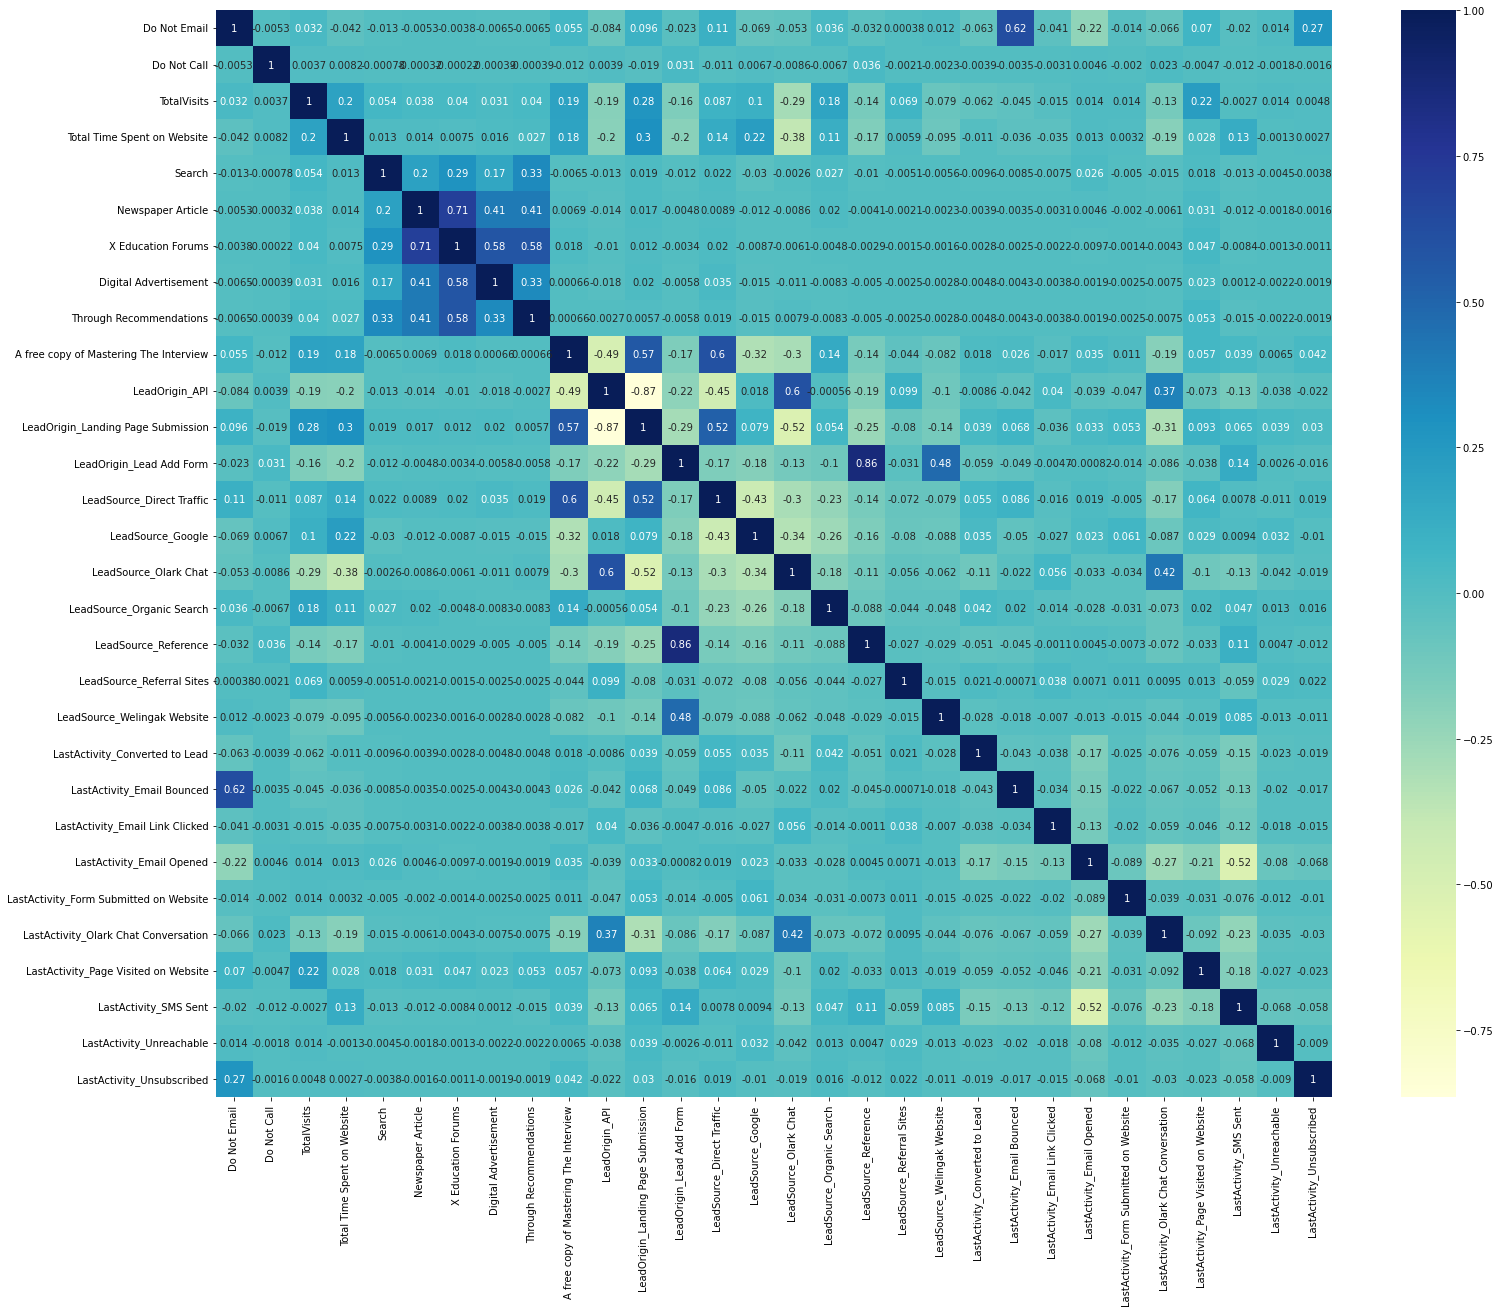

In [333]:
plt.figure(figsize = (25, 20))
sns.heatmap(X_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Dropping highly correlated dummy variables

In [334]:
X_test = X_test.drop(['LastActivity_Email Bounced','LeadOrigin_Lead Add Form','LeadOrigin_Landing Page Submission',
                      'LeadSource_Olark Chat'], 1)
X_train = X_train.drop(['LastActivity_Email Bounced','LeadOrigin_Lead Add Form','LeadOrigin_Landing Page Submission',
                        'LeadSource_Olark Chat'], 1)

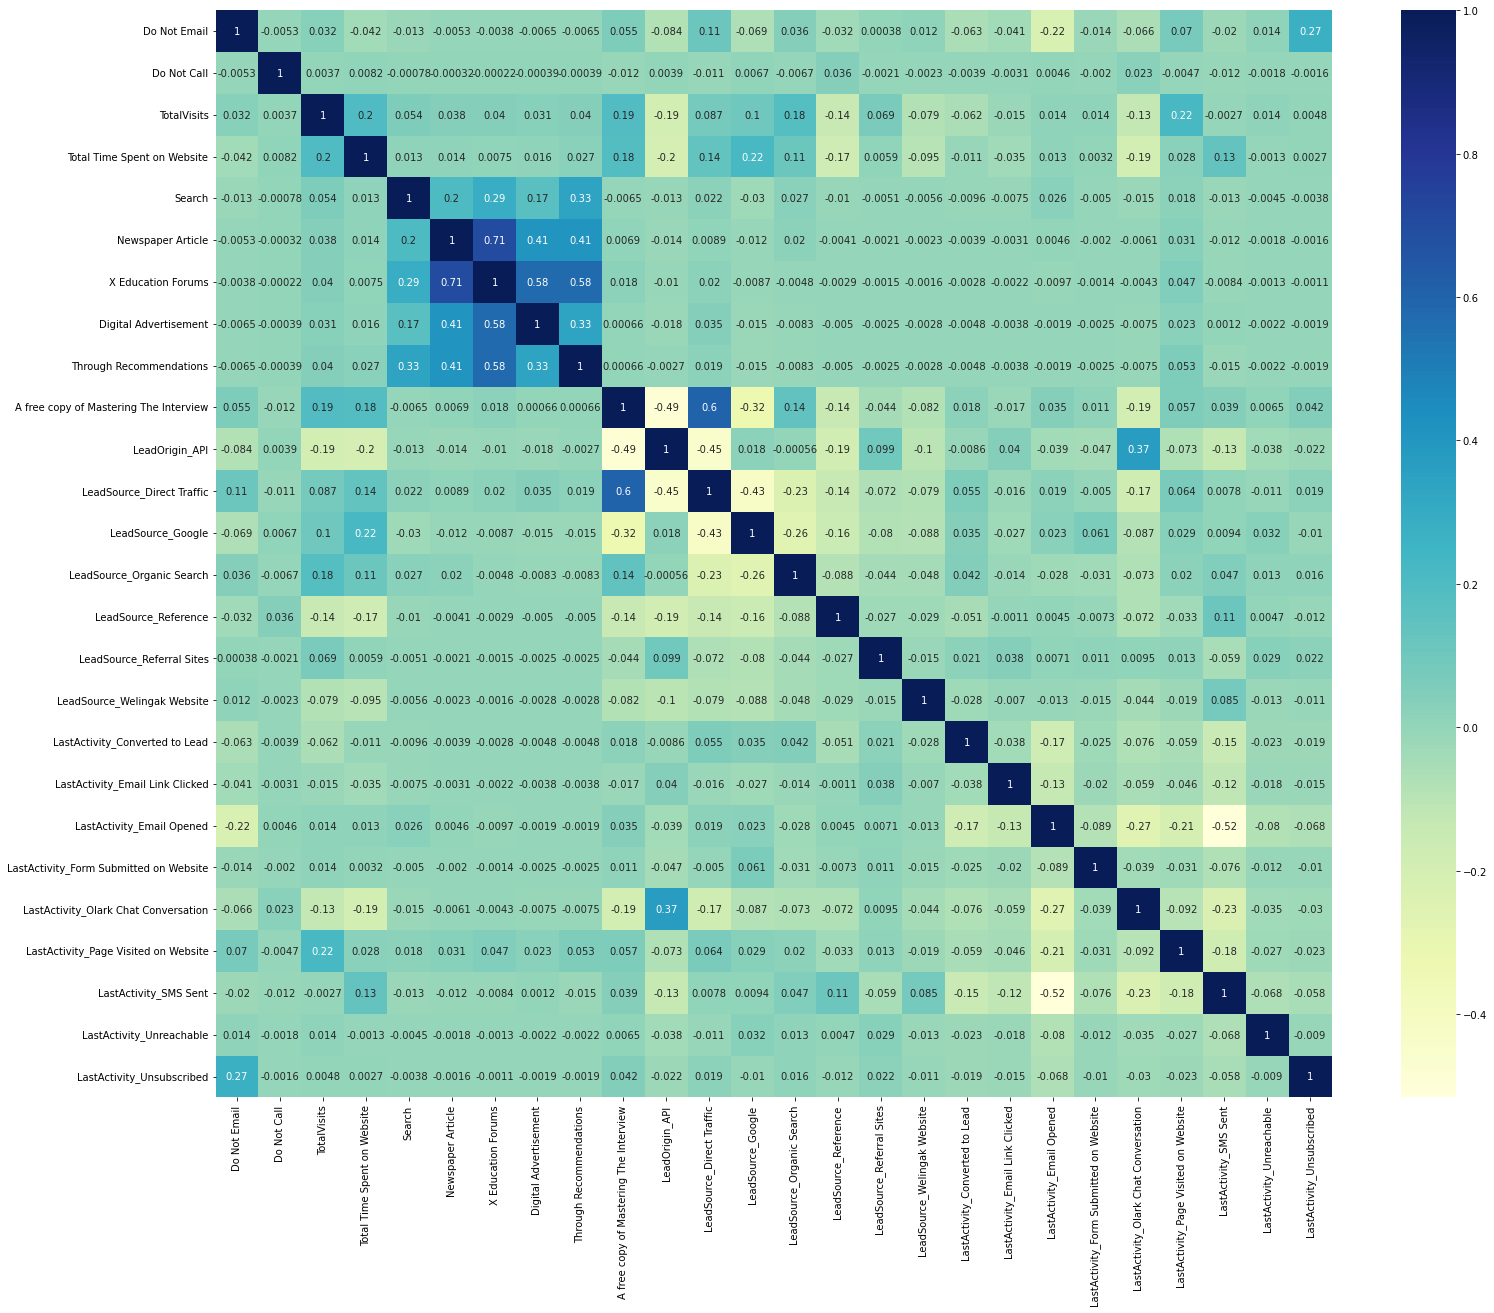

In [335]:
plt.figure(figsize = (25, 20))
sns.heatmap(X_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [ ]:
X_test = X_test.drop(['X Education Forums','A free copy of Mastering The Interview','LeadSource_Direct Traffic'], 1)
X_train = X_train.drop(['X Education Forums','A free copy of Mastering The Interview','LeadSource_Direct Traffic'], 1)

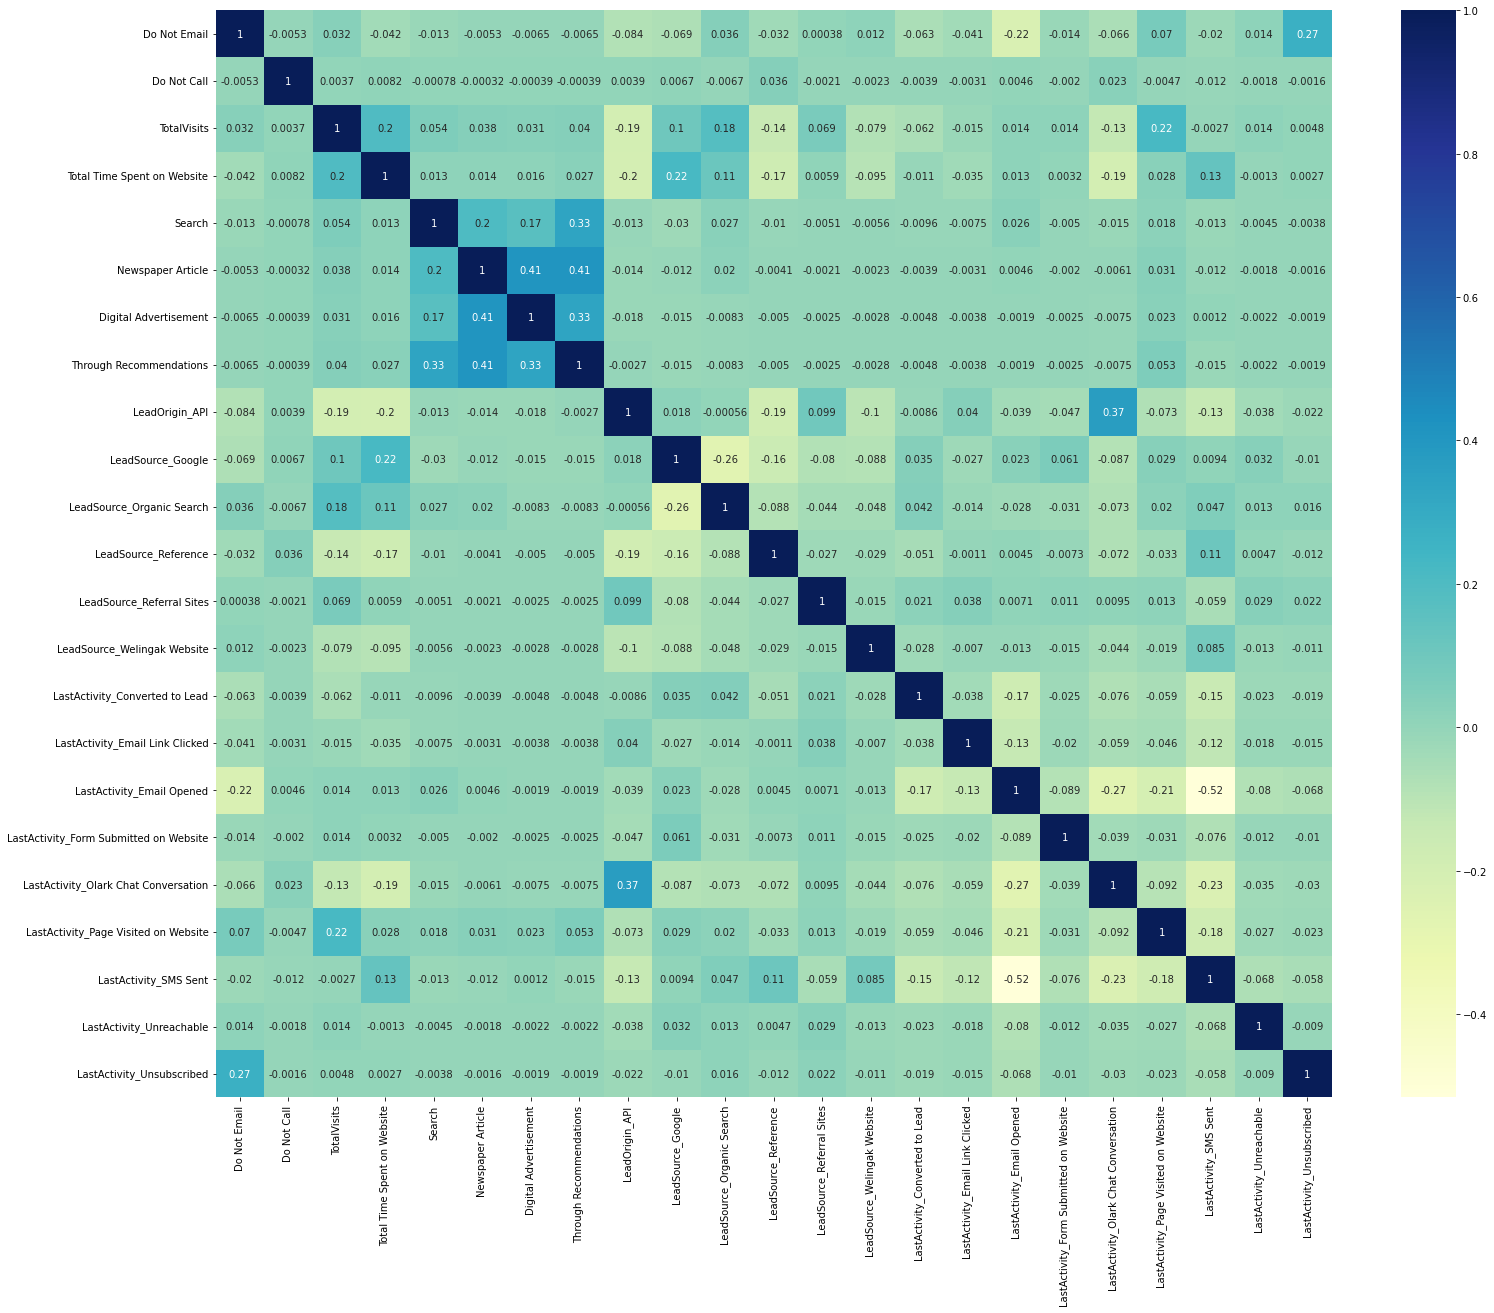

In [339]:
plt.figure(figsize = (25, 20))
sns.heatmap(X_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [341]:
X_test = X_test.drop(['LastActivity_Email Opened','LeadSource_Organic Search','Newspaper Article',
                      'Through Recommendations'], 1)
X_train = X_train.drop(['LastActivity_Email Opened','LeadSource_Organic Search','Newspaper Article',
                        'Through Recommendations'], 1)

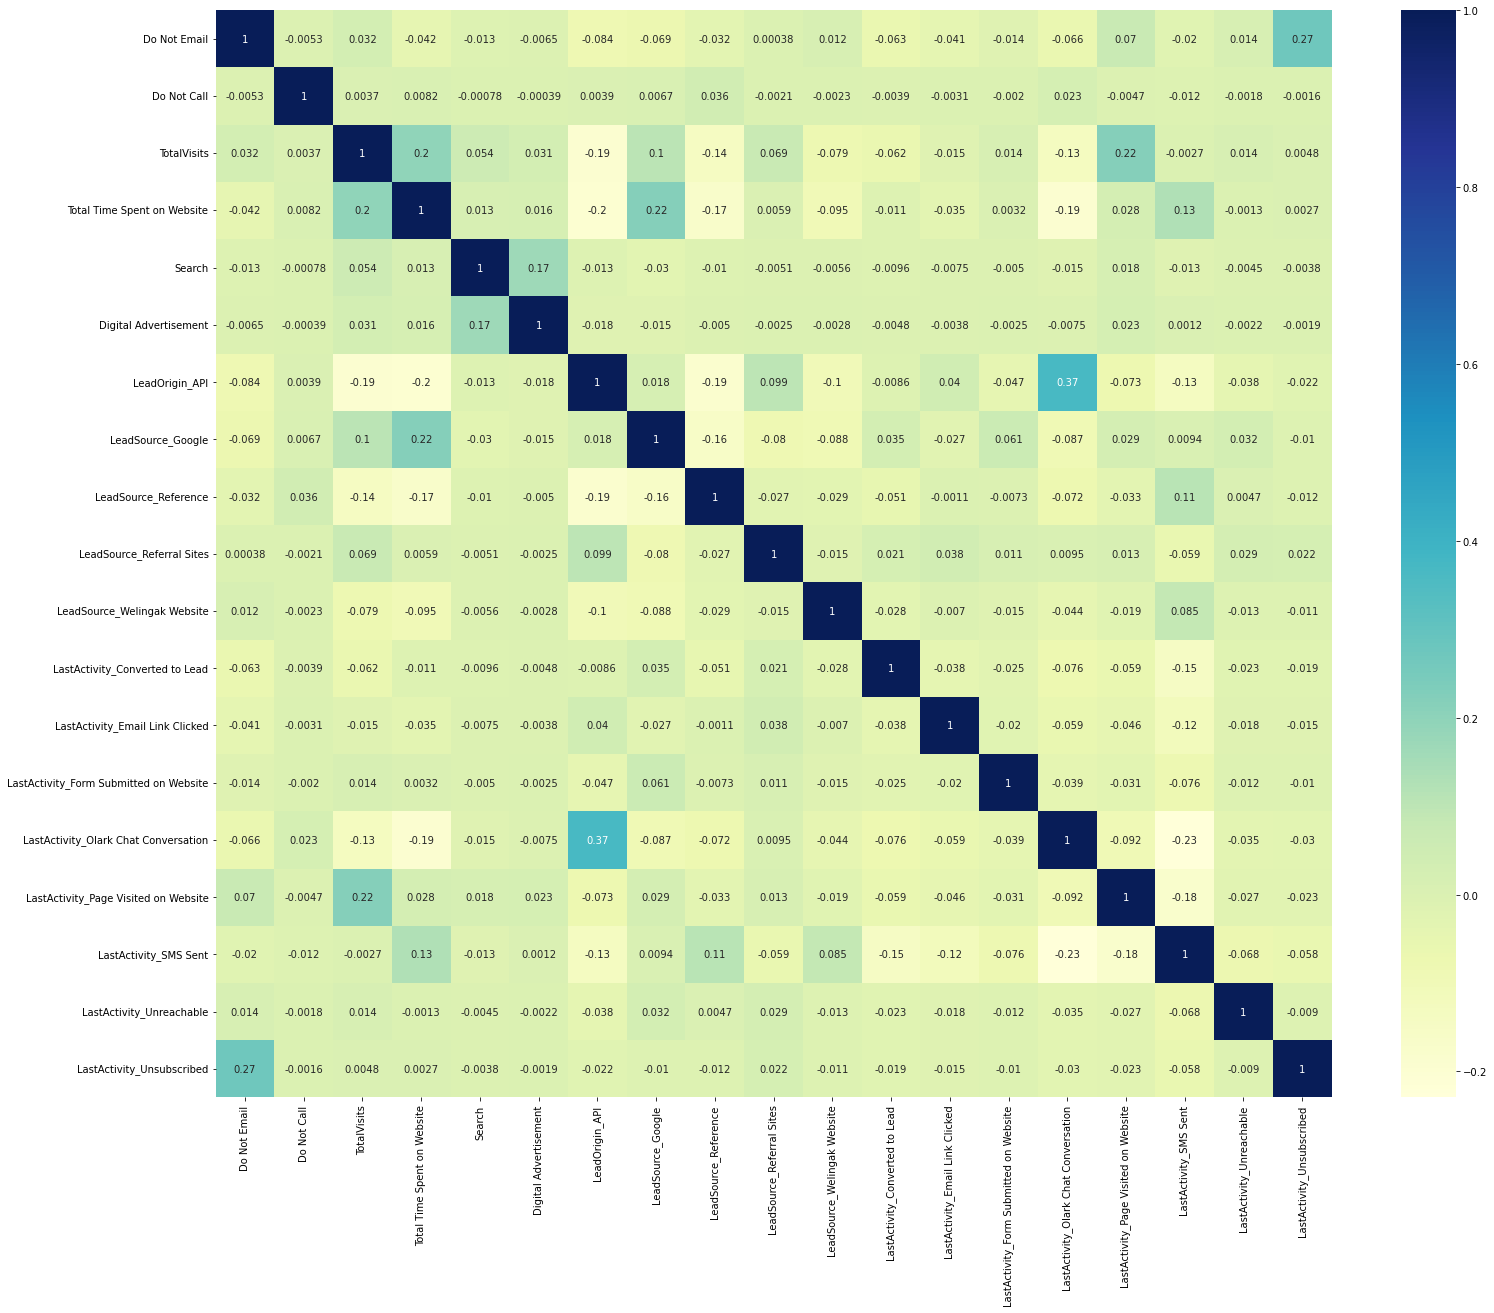

In [342]:
plt.figure(figsize = (25, 20))
sns.heatmap(X_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [343]:
lead_final[lead_final['LastActivity_Olark Chat Conversation'] ==1].shape

(971, 35)

In [344]:
lead_final[lead_final['LastActivity_Unsubscribed'] ==1].shape

(58, 35)

In [345]:
X_test = X_test.drop(['LastActivity_Olark Chat Conversation','LastActivity_Unsubscribed'], 1)
X_train = X_train.drop(['LastActivity_Olark Chat Conversation','LastActivity_Unsubscribed'], 1)

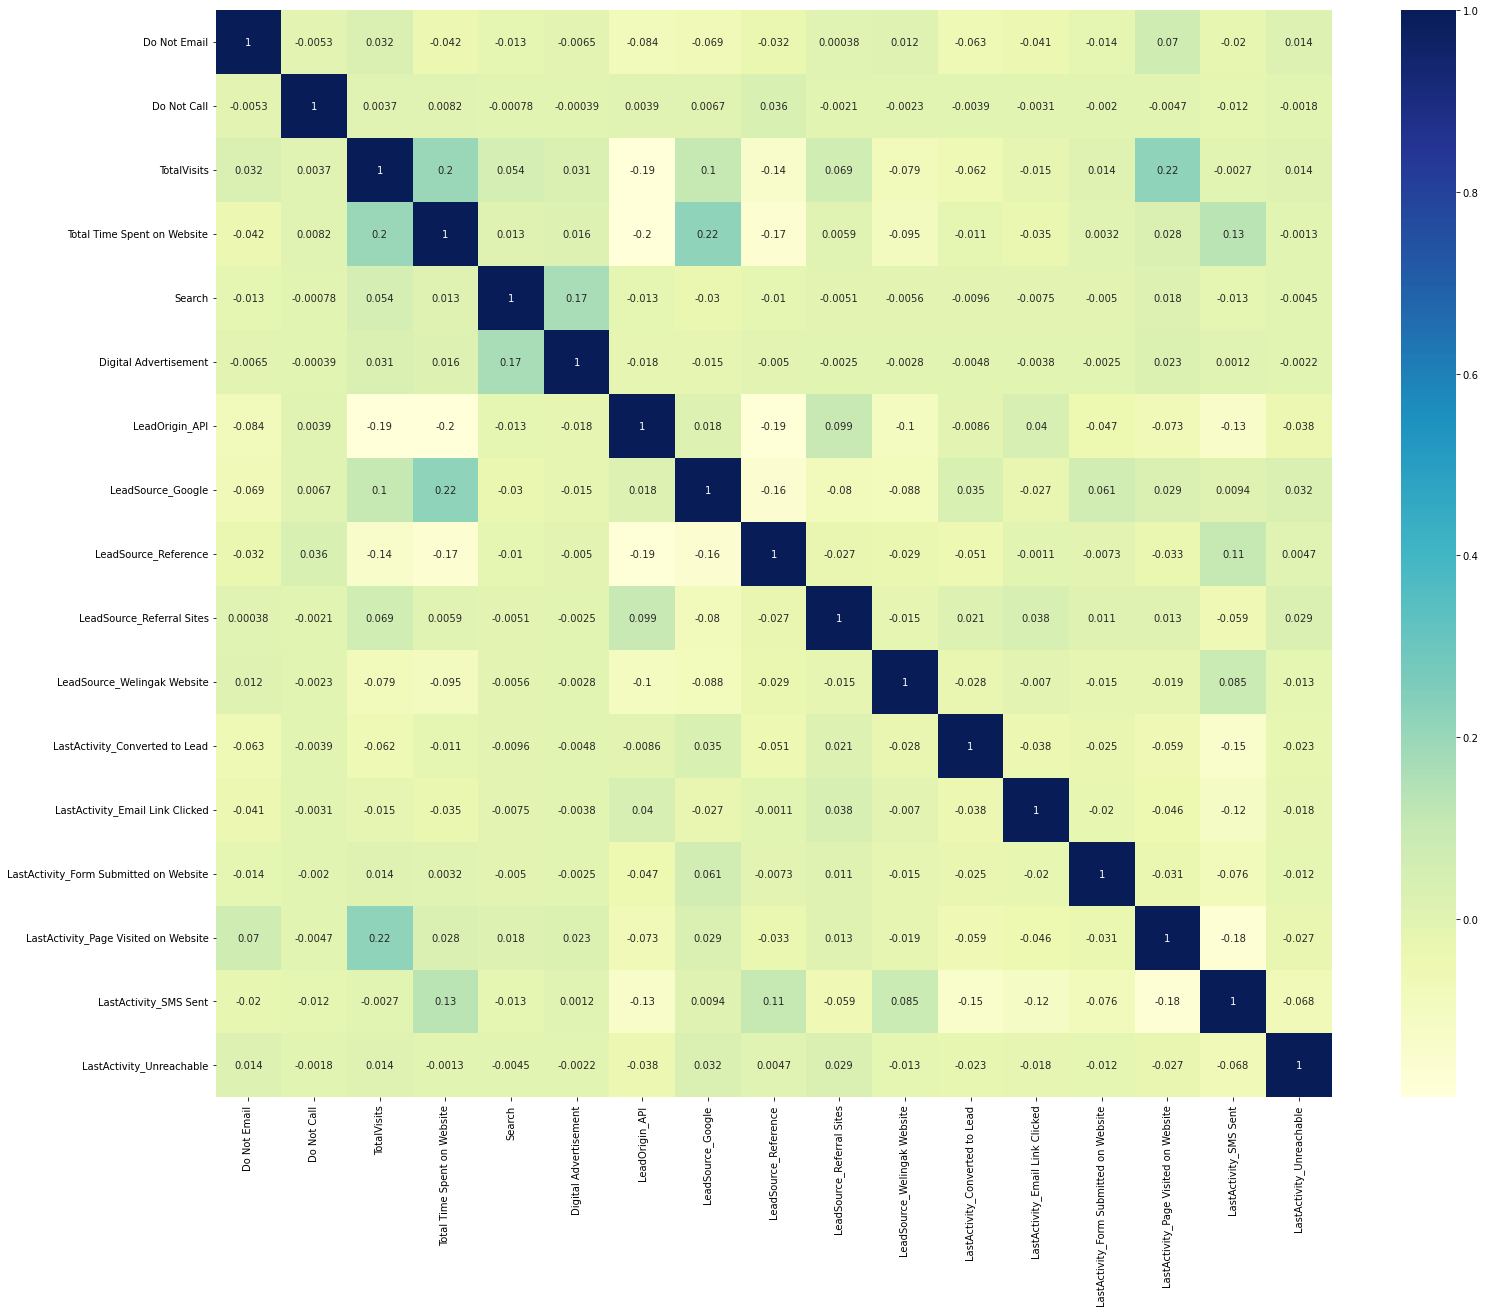

In [346]:
plt.figure(figsize = (25, 20))
sns.heatmap(X_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Step - Model Building

In [347]:
# Logistic regression model
logm_test = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm_test.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6302
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3019.9
Date:                Mon, 27 Feb 2023   Deviance:                       6039.8
Time:                        01:05:11   Pearson chi2:                 6.45e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3129
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -2.1057      0.078    -26.845      0.000      -2.259      -1.952
Do Not Email                              -1.3910      0.150     -9.289      0.000      -1.684      -1.097
Do Not Call                               19.1418   1.24e+04      0.002      0.999   -2.42e+04    2.43e+04
TotalVisits                                5.4025      1.911      2.827      0.005       1.657       9.148
Total Time Spent on Website                4.0650      0.144     28.195      0.000       3.782       4.348
Search                                     0.2058      0.658      0.313      0.755      -1.084       1.496
Digital Advertisement                     -0.8020      1.269     -0.632      0.527      -3.289       1.685
LeadOrigin_API                             0.3817      0.072      5.329      0.000       0.241       0.522
LeadSource_Google                         -0.0698      0.069     -1.012      0.311      -0.205       0.065
LeadSource_Reference                       3.9865      0.216     18.458      0.000       3.563       4.410
LeadSource_Referral Sites                 -0.8180      0.313     -2.611      0.009      -1.432      -0.204
LeadSource_Welingak Website                5.5308      0.722      7.656      0.000       4.115       6.947
LastActivity_Converted to Lead            -1.0087      0.192     -5.263      0.000      -1.384      -0.633
LastActivity_Email Link Clicked           -0.2374      0.202     -1.174      0.240      -0.634       0.159
LastActivity_Form Submitted on Website    -0.5440      0.316     -1.721      0.085      -1.164       0.076
LastActivity_Page Visited on Website      -0.4178      0.143     -2.932      0.003      -0.697      -0.139
LastActivity_SMS Sent                      1.2339      0.071     17.387      0.000       1.095       1.373
LastActivity_Unreachable                  -0.1046      0.320     -0.327      0.744      -0.732       0.523
==========================================================================================================
"""

### Step : Feature Selection Using RFE

In [348]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [349]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [350]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True, False])

In [351]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Search', True, 1),
 ('Digital Advertisement', True, 1),
 ('LeadOrigin_API', True, 1),
 ('LeadSource_Google', False, 3),
 ('LeadSource_Reference', True, 1),
 ('LeadSource_Referral Sites', True, 1),
 ('LeadSource_Welingak Website', True, 1),
 ('LastActivity_Converted to Lead', True, 1),
 ('LastActivity_Email Link Clicked', True, 1),
 ('LastActivity_Form Submitted on Website', True, 1),
 ('LastActivity_Page Visited on Website', True, 1),
 ('LastActivity_SMS Sent', True, 1),
 ('LastActivity_Unreachable', False, 2)]

In [352]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Search', 'Digital Advertisement',
       'LeadOrigin_API', 'LeadSource_Reference', 'LeadSource_Referral Sites',
       'LeadSource_Welingak Website', 'LastActivity_Converted to Lead',
       'LastActivity_Email Link Clicked',
       'LastActivity_Form Submitted on Website',
       'LastActivity_Page Visited on Website', 'LastActivity_SMS Sent'],
      dtype='object')

##### Assessing the model with StatsModels

In [353]:
X_train_sm1 = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm1, family = sm.families.Binomial())
res1 = logm1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6304
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3020.5
Date:                Mon, 27 Feb 2023   Deviance:                       6040.9
Time:                        01:05:34   Pearson chi2:                 6.45e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3128
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -2.1236      0.077    -27.725      0.000      -2.274      -1.973
Do Not Email                              -1.3835      0.150     -9.251      0.000      -1.677      -1.090
Do Not Call                               19.1265   1.24e+04      0.002      0.999   -2.43e+04    2.43e+04
TotalVisits                                5.2757      1.884      2.800      0.005       1.583       8.968
Total Time Spent on Website                4.0383      0.141     28.560      0.000       3.761       4.315
Search                                     0.2347      0.657      0.357      0.721      -1.053       1.522
Digital Advertisement                     -0.7765      1.267     -0.613      0.540      -3.261       1.708
LeadOrigin_API                             0.3778      0.071      5.302      0.000       0.238       0.518
LeadSource_Reference                       4.0020      0.215     18.580      0.000       3.580       4.424
LeadSource_Referral Sites                 -0.7889      0.311     -2.534      0.011      -1.399      -0.179
LeadSource_Welingak Website                5.5466      0.722      7.680      0.000       4.131       6.962
LastActivity_Converted to Lead            -1.0095      0.191     -5.274      0.000      -1.385      -0.634
LastActivity_Email Link Clicked           -0.2327      0.202     -1.151      0.250      -0.629       0.164
LastActivity_Form Submitted on Website    -0.5556      0.315     -1.763      0.078      -1.173       0.062
LastActivity_Page Visited on Website      -0.4180      0.142     -2.939      0.003      -0.697      -0.139
LastActivity_SMS Sent                      1.2349      0.071     17.487      0.000       1.097       1.373
==========================================================================================================
"""

In [354]:
# Getting the predicted values on the train set
y_train_pred1 = res1.predict(X_train_sm1)
# y_train_pred[:10]

In [355]:
y_train_pred1.shape

(6320,)

In [356]:
y_train_pred1.values

array([0.95744127, 0.95744127, 0.14858438, ..., 0.48596852, 0.57094031,
       0.28334034])

In [357]:
y_train_pred1 = y_train_pred1.values.reshape(-1)

In [358]:
y_train_pred_1 = pd.DataFrame({'Converted':y_train.values, 'Convert_Prob':y_train_pred1})
y_train_pred_1['Lead_ID'] = y_train.index
y_train_pred_1.head()

,Converted,Convert_Prob,Lead_ID
0,0,0.957441,5535
1,1,0.957441,8079
2,0,0.148584,4759
3,0,0.148584,9117
4,0,0.179108,2428


In [359]:
y_train_pred_1['predicted'] = y_train_pred_1.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [360]:
y_train_pred_1.head()

,Converted,Convert_Prob,Lead_ID,predicted
0,0,0.957441,5535,1
1,1,0.957441,8079,1
2,0,0.148584,4759,0
3,0,0.148584,9117,0
4,0,0.179108,2428,0


In [361]:
y_train_pred_1[y_train_pred_1.Converted == y_train_pred_1.predicted].shape[0]/y_train_pred_1.shape[0]

0.7718354430379747

In [362]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_1.Converted, y_train_pred_1.predicted )
print(confusion)

[[3426  474]
 [ 968 1452]]


In [363]:
print(metrics.accuracy_score(y_train_pred_1.Converted, y_train_pred_1.predicted))

0.7718354430379747


#### Checking VIFs

In [364]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [365]:
col

Index(['Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Search', 'Digital Advertisement',
       'LeadOrigin_API', 'LeadSource_Reference', 'LeadSource_Referral Sites',
       'LeadSource_Welingak Website', 'LastActivity_Converted to Lead',
       'LastActivity_Email Link Clicked',
       'LastActivity_Form Submitted on Website',
       'LastActivity_Page Visited on Website', 'LastActivity_SMS Sent'],
      dtype='object')

In [366]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Total Time Spent on Website,1.62
2,TotalVisits,1.49
14,LastActivity_SMS Sent,1.47
6,LeadOrigin_API,1.19
13,LastActivity_Page Visited on Website,1.16
7,LeadSource_Reference,1.07
0,Do Not Email,1.06
8,LeadSource_Referral Sites,1.04
10,LastActivity_Converted to Lead,1.04
11,LastActivity_Email Link Clicked,1.04


#### As VIF values are pretty low, eliminating variables based on P-values of the model

In [367]:
col = col.drop('Do Not Call', 1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website', 'Search',
       'Digital Advertisement', 'LeadOrigin_API', 'LeadSource_Reference',
       'LeadSource_Referral Sites', 'LeadSource_Welingak Website',
       'LastActivity_Converted to Lead', 'LastActivity_Email Link Clicked',
       'LastActivity_Form Submitted on Website',
       'LastActivity_Page Visited on Website', 'LastActivity_SMS Sent'],
      dtype='object')

### Model -2

In [368]:
X_train_sm2 = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm2, family = sm.families.Binomial())
res2 = logm2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6305
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3020.9
Date:                Mon, 27 Feb 2023   Deviance:                       6041.8
Time:                        01:06:07   Pearson chi2:                 6.45e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3127
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -2.1243      0.077    -27.731      0.000      -2.274      -1.974
Do Not Email                              -1.3840      0.150     -9.253      0.000      -1.677      -1.091
TotalVisits                                5.2962      1.887      2.807      0.005       1.598       8.994
Total Time Spent on Website                4.0404      0.141     28.580      0.000       3.763       4.318
Search                                     0.2341      0.657      0.356      0.722      -1.054       1.522
Digital Advertisement                     -0.7769      1.267     -0.613      0.540      -3.261       1.707
LeadOrigin_API                             0.3789      0.071      5.318      0.000       0.239       0.519
LeadSource_Reference                       4.0085      0.215     18.614      0.000       3.586       4.431
LeadSource_Referral Sites                 -0.7900      0.311     -2.537      0.011      -1.400      -0.180
LeadSource_Welingak Website                5.5477      0.722      7.681      0.000       4.132       6.963
LastActivity_Converted to Lead            -1.0101      0.191     -5.276      0.000      -1.385      -0.635
LastActivity_Email Link Clicked           -0.2336      0.202     -1.155      0.248      -0.630       0.163
LastActivity_Form Submitted on Website    -0.5563      0.315     -1.765      0.077      -1.174       0.061
LastActivity_Page Visited on Website      -0.4189      0.142     -2.945      0.003      -0.698      -0.140
LastActivity_SMS Sent                      1.2344      0.071     17.478      0.000       1.096       1.373
==========================================================================================================
"""

In [369]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Total Time Spent on Website,1.62
1,TotalVisits,1.49
13,LastActivity_SMS Sent,1.47
5,LeadOrigin_API,1.19
12,LastActivity_Page Visited on Website,1.16
6,LeadSource_Reference,1.07
0,Do Not Email,1.06
7,LeadSource_Referral Sites,1.04
9,LastActivity_Converted to Lead,1.04
10,LastActivity_Email Link Clicked,1.04


#### Dropping Search, Digital Advertisement	

In [370]:
col = col.drop(['Digital Advertisement','Search'], 1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'LeadOrigin_API', 'LeadSource_Reference', 'LeadSource_Referral Sites',
       'LeadSource_Welingak Website', 'LastActivity_Converted to Lead',
       'LastActivity_Email Link Clicked',
       'LastActivity_Form Submitted on Website',
       'LastActivity_Page Visited on Website', 'LastActivity_SMS Sent'],
      dtype='object')

### Model -3

In [371]:
X_train_sm3 = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm3, family = sm.families.Binomial())
res3 = logm3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6307
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3021.1
Date:                Mon, 27 Feb 2023   Deviance:                       6042.3
Time:                        01:06:22   Pearson chi2:                 6.45e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3126
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -2.1240      0.077    -27.729      0.000      -2.274      -1.974
Do Not Email                              -1.3839      0.150     -9.253      0.000      -1.677      -1.091
TotalVisits                                5.3037      1.884      2.815      0.005       1.611       8.996
Total Time Spent on Website                4.0395      0.141     28.577      0.000       3.762       4.317
LeadOrigin_API                             0.3793      0.071      5.324      0.000       0.240       0.519
LeadSource_Reference                       4.0085      0.215     18.614      0.000       3.586       4.431
LeadSource_Referral Sites                 -0.7903      0.311     -2.538      0.011      -1.401      -0.180
LeadSource_Welingak Website                5.5476      0.722      7.681      0.000       4.132       6.963
LastActivity_Converted to Lead            -1.0102      0.191     -5.277      0.000      -1.385      -0.635
LastActivity_Email Link Clicked           -0.2339      0.202     -1.156      0.248      -0.630       0.163
LastActivity_Form Submitted on Website    -0.5565      0.315     -1.766      0.077      -1.174       0.061
LastActivity_Page Visited on Website      -0.4202      0.142     -2.955      0.003      -0.699      -0.141
LastActivity_SMS Sent                      1.2339      0.071     17.474      0.000       1.096       1.372
==========================================================================================================
"""

#### Dropping "LastActivity_Email Link Clicked" due to high P-value

In [372]:
col = col.drop(['LastActivity_Email Link Clicked'], 1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'LeadOrigin_API', 'LeadSource_Reference', 'LeadSource_Referral Sites',
       'LeadSource_Welingak Website', 'LastActivity_Converted to Lead',
       'LastActivity_Form Submitted on Website',
       'LastActivity_Page Visited on Website', 'LastActivity_SMS Sent'],
      dtype='object')

### Model-4

In [373]:
X_train_sm4 = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm4, family = sm.families.Binomial())
res4 = logm4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6308
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3021.8
Date:                Mon, 27 Feb 2023   Deviance:                       6043.6
Time:                        01:06:26   Pearson chi2:                 6.45e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3125
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -2.1357      0.076    -28.095      0.000      -2.285      -1.987
Do Not Email                              -1.3792      0.150     -9.222      0.000      -1.672      -1.086
TotalVisits                                5.2982      1.883      2.814      0.005       1.607       8.989
Total Time Spent on Website                4.0412      0.141     28.590      0.000       3.764       4.318
LeadOrigin_API                             0.3791      0.071      5.321      0.000       0.239       0.519
LeadSource_Reference                       4.0061      0.215     18.607      0.000       3.584       4.428
LeadSource_Referral Sites                 -0.8022      0.311     -2.580      0.010      -1.412      -0.193
LeadSource_Welingak Website                5.5450      0.722      7.678      0.000       4.129       6.961
LastActivity_Converted to Lead            -0.9987      0.191     -5.223      0.000      -1.373      -0.624
LastActivity_Form Submitted on Website    -0.5451      0.315     -1.731      0.084      -1.162       0.072
LastActivity_Page Visited on Website      -0.4090      0.142     -2.882      0.004      -0.687      -0.131
LastActivity_SMS Sent                      1.2452      0.070     17.790      0.000       1.108       1.382
==========================================================================================================
"""

In [374]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Total Time Spent on Website,1.61
1,TotalVisits,1.48
10,LastActivity_SMS Sent,1.46
3,LeadOrigin_API,1.17
9,LastActivity_Page Visited on Website,1.16
0,Do Not Email,1.06
4,LeadSource_Reference,1.06
7,LastActivity_Converted to Lead,1.04
5,LeadSource_Referral Sites,1.03
6,LeadSource_Welingak Website,1.03


### Model-5

In [375]:
col = col.drop(['LastActivity_Form Submitted on Website'], 1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'LeadOrigin_API', 'LeadSource_Reference', 'LeadSource_Referral Sites',
       'LeadSource_Welingak Website', 'LastActivity_Converted to Lead',
       'LastActivity_Page Visited on Website', 'LastActivity_SMS Sent'],
      dtype='object')

In [376]:
X_train_sm5 = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm5, family = sm.families.Binomial())
res5 = logm5.fit()
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6309
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3023.4
Date:                Mon, 27 Feb 2023   Deviance:                       6046.8
Time:                        01:06:31   Pearson chi2:                 6.46e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3121
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -2.1497      0.076    -28.410      0.000      -2.298      -2.001
Do Not Email                            -1.3751      0.150     -9.194      0.000      -1.668      -1.082
TotalVisits                              5.3061      1.884      2.817      0.005       1.614       8.998
Total Time Spent on Website              4.0394      0.141     28.591      0.000       3.762       4.316
LeadOrigin_API                           0.3853      0.071      5.415      0.000       0.246       0.525
LeadSource_Reference                     4.0108      0.215     18.627      0.000       3.589       4.433
LeadSource_Referral Sites               -0.8017      0.311     -2.581      0.010      -1.411      -0.193
LeadSource_Welingak Website              5.5528      0.722      7.688      0.000       4.137       6.968
LastActivity_Converted to Lead          -0.9866      0.191     -5.163      0.000      -1.361      -0.612
LastActivity_Page Visited on Website    -0.3968      0.142     -2.800      0.005      -0.675      -0.119
LastActivity_SMS Sent                    1.2571      0.070     18.034      0.000       1.120       1.394
========================================================================================================
"""

#### All variables have a good value of VIF and p_value. So we need not drop any more variables and we can proceed with making predictions using this model only

In [377]:
y_train_pred = res5.predict(X_train_sm5).values.reshape(-1)

In [378]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['Lead_ID'] = y_train.index
y_train_pred_final.head()

,Converted,Convert_Prob,Lead_ID
0,0,0.957632,5535
1,1,0.957632,8079
2,0,0.146232,4759
3,0,0.146232,9117
4,0,0.212817,2428


In [379]:
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Convert_Prob,Lead_ID,predicted
0,0,0.957632,5535,1
1,1,0.957632,8079,1
2,0,0.146232,4759,0
3,0,0.146232,9117,0
4,0,0.212817,2428,0


In [380]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7724683544303798


In [381]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3426,  474],
       [ 964, 1456]], dtype=int64)

In [382]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [383]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6016528925619835

In [384]:
# Let us calculate specificity
TN / float(TN+FP)

0.8784615384615385

In [385]:
# Calculate false postive rate - predicting as converted when leads aren't converted actually
print(FP/ float(TN+FP))

0.12153846153846154


In [386]:
# positive predictive value 
print (TP / float(TP+FP))

0.7544041450777202


In [387]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7804100227790433


### Step : Plotting the ROC Curve

In [388]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

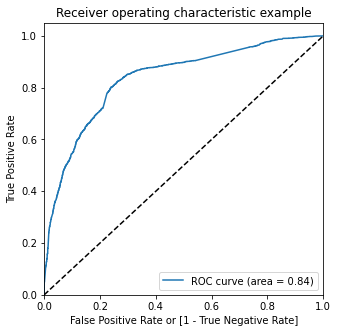

In [389]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Convert_Prob)

### Step : Finding Optimal Cutoff Point

In [390]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Convert_Prob,Lead_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.957632,5535,1,1,1,1,1,1,1,1,1,1,1
1,1,0.957632,8079,1,1,1,1,1,1,1,1,1,1,1
2,0,0.146232,4759,0,1,1,0,0,0,0,0,0,0,0
3,0,0.146232,9117,0,1,1,0,0,0,0,0,0,0,0
4,0,0.212817,2428,0,1,1,1,0,0,0,0,0,0,0


In [392]:
y_train_pred_final[0.35]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_train_pred_final[0.37]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.37 else 0)

In [393]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.35,0.37,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy     sensi     speci
0.00  0.00  0.382911  1.000000  0.000000
0.10  0.10  0.463291  0.990496  0.136154
0.20  0.20  0.715506  0.878099  0.614615
0.30  0.30  0.764241  0.839669  0.717436
0.35  0.35  0.774367  0.802066  0.757179
0.37  0.37  0.775633  0.781818  0.771795
0.40  0.40  0.767880  0.701240  0.809231
0.50  0.50  0.772468  0.601653  0.878462
0.60  0.60  0.760759  0.513636  0.914103
0.70  0.70  0.743671  0.421901  0.943333
0.80  0.80  0.718513  0.314463  0.969231
0.90  0.90  0.664557  0.140909  0.989487


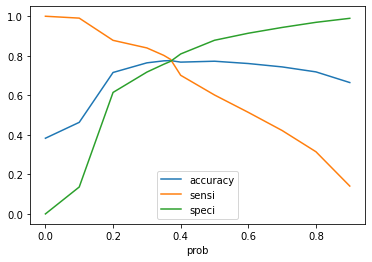

In [394]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [395]:
y_train_pred_final.head()

,Converted,Convert_Prob,Lead_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.35,0.37
0,0,0.957632,5535,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1,0.957632,8079,1,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.146232,4759,0,1,1,0,0,0,0,0,0,0,0,0,0
3,0,0.146232,9117,0,1,1,0,0,0,0,0,0,0,0,0,0
4,0,0.212817,2428,0,1,1,1,0,0,0,0,0,0,0,0,0


#### From the above curv 0.37 is the optimum point to take it as cutoff probability as both sensitivity and specificity are merging

In [396]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Convert_Prob.map( lambda x: 1 if x > 0.37 else 0)

y_train_pred_final.head()

,Converted,Convert_Prob,Lead_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.35,0.37,final_predicted
0,0,0.957632,5535,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1,0.957632,8079,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.146232,4759,0,1,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0.146232,9117,0,1,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0.212817,2428,0,1,1,1,0,0,0,0,0,0,0,0,0,0


In [397]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7756329113924051

In [398]:
confusion_final = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion_final

array([[3010,  890],
       [ 528, 1892]], dtype=int64)

In [399]:
TP_final = confusion_final[1,1] # true positive 
TN_final = confusion_final[0,0] # true negatives
FP_final = confusion_final[0,1] # false positives
FN_final = confusion_final[1,0] # false negatives

In [400]:
# Let's see the sensitivity of our logistic regression model
TP_final / float(TP_final+FN_final)

0.7818181818181819

In [401]:
# Let us calculate specificity
TN_final / float(TN_final+FP_final)

0.7717948717948718

In [402]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP_final/ float(TN_final+FP_final))

0.2282051282051282


In [403]:
# Positive predictive value 
print (TP_final / float(TP_final+FP_final))

0.6800862688713156


In [404]:
# Negative predictive value
print (TN_final / float(TN_final+ FN_final))

0.8507631430186546


### Precision and Recall

#### Precision - 
TP / TP + FP

In [405]:
TP_final/float(TP_final+FP_final)

0.6800862688713156

#### Recall
TP/TP+FN

In [406]:
TP_final / float(TP_final+FN_final)

0.7818181818181819

In [407]:
from sklearn.metrics import precision_score, recall_score

In [408]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.6800862688713156

In [409]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7818181818181819

### Step : Making predictions on the test set

In [410]:
X_test[['TotalVisits','Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website']])

In [411]:
X_test = X_test[col]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,LeadOrigin_API,LeadSource_Reference,LeadSource_Referral Sites,LeadSource_Welingak Website,LastActivity_Converted to Lead,LastActivity_Page Visited on Website,LastActivity_SMS Sent
4709,0,0.003984,0.019973,0,0,0,0,1,0,0
5438,0,0.019920,0.123391,0,0,0,0,0,0,0
1621,0,0.000000,0.000000,1,0,0,0,0,0,0
2139,0,0.019920,0.288948,0,0,0,0,0,0,0
9181,0,0.019920,0.047492,0,0,0,0,0,0,1


In [412]:
X_test_sm = sm.add_constant(X_test)

In [413]:
y_test_pred = res5.predict(X_test_sm)

In [414]:
y_test_pred[:10]

4709    0.045889
5438    0.175719
1621    0.146232
2139    0.293824
9181    0.355455
1072    0.146232
546     0.524852
451     0.197006
3769    0.146232
4293    0.146232
dtype: float64

In [415]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
4709,0.045889
5438,0.175719
1621,0.146232
2139,0.293824
9181,0.355455


In [416]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [417]:
# Putting Lead_ID to index
y_test_df['Lead_ID'] = y_test_df.index

In [418]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [419]:
# Appending y_test_df and y_pred_1
y_test_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [421]:
y_test_pred_final.head()

,Converted,Lead_ID,0
0,0,4709,0.045889
1,0,5438,0.175719
2,0,1621,0.146232
3,1,2139,0.293824
4,0,9181,0.355455


In [422]:
# Renaming the column 
y_test_pred_final= y_test_pred_final.rename(columns={ 0 : 'Convert_Prob'})

In [427]:
y_test_pred_final.head()

,Lead_ID,Converted,Convert_Prob
0,4709,0,0.045889
1,5438,0,0.175719
2,1621,0,0.146232
3,2139,1,0.293824
4,9181,0,0.355455


In [426]:
# Rearranging the columns
y_test_pred_final = y_test_pred_final.reindex(['Lead_ID','Converted','Convert_Prob'], axis=1)

In [428]:
y_test_pred_final.head()

,Lead_ID,Converted,Convert_Prob
0,4709,0,0.045889
1,5438,0,0.175719
2,1621,0,0.146232
3,2139,1,0.293824
4,9181,0,0.355455


In [429]:
y_test_pred_final['final_predicted'] = y_test_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.37 else 0)

In [430]:
y_test_pred_final.head()

,Lead_ID,Converted,Convert_Prob,final_predicted
0,4709,0,0.045889,0
1,5438,0,0.175719,0
2,1621,0,0.146232,0
3,2139,1,0.293824,0
4,9181,0,0.355455,0


In [431]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.final_predicted)

0.8062015503875969

In [432]:
confusion_test = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.final_predicted )
confusion_test

array([[1384,  330],
       [ 195,  800]], dtype=int64)

In [433]:
TP_test = confusion_test[1,1] # true positive 
TN_test = confusion_test[0,0] # true negatives
FP_test = confusion_test[0,1] # false positives
FN_test = confusion_test[1,0] # false negatives

In [434]:
# Let's see the sensitivity of our logistic regression model
TP_test / float(TP_test+FN_test)

0.8040201005025126

In [435]:
# Let us calculate specificity
TN_test / float(TN_test+FP_test)

0.8074679113185531